# Predicting Absenteeism in the workplace

### Definition:

Employee Absenteeism in it’s simplest definition refers to a frequent lack of attendance at work. The National Institute for Occupational Safety and Health (NIOSH) defines absenteeism in the work place as time taken off work due to illness or other reasons such as child care, transportation issues, etc. *(Absenteeism in the Workplace 2020).* The U.S. Department of Labor (DOL) defines absenteeism as *“instances when persons who usually work 35 or more hours per week (full time) worked less than 35 hours during the reference week for one of the following reasons: own illness, injury, or medical problems; child care problems; other family or personal obligations; civic or military duty; and maternity or paternity leave” (Absences from work of employed full-time wage and salary workers by occupation and industry 2020).* However, instances where work is missed due to vacation, personal time off, holiday, labor dispute, and other related reasons don’t count as employee absenteeism. 

### Case for this project:

For the year 2019, the U.S. Department of Labor (DOL) estimated that on average, about 2.8 percent of full time employees were absent on any given day leading to an average loss worktime rate (hours absent as a percent of hours usually worked) of about 1.4 percent. The impact of absenteeism is even more severe when work hours lost lead to decreased productivity, morale and temporary labor costs. Many employers dismiss employee absenteeism as a negligeable cost of doing business but the reality is that employee absenteeism is detrimental to most organizations. According to the Centers for Disease Control (CDC), productivity losses from missed work cost employers about 225.8 billion USD, or an average of $1,685 per employee, each year *(Workplace Health Promotion, 2020).*

In 2014, the Society for Human Resource Management (SHRM) in collaboration with and commissioned by Kronos, Incorporated, conducted a study that surveyed 733 SHRM members, Kronos customers and Kronos prospects on the impact of employee Absences in the U.S. According to the research study, the following were recorded as direct costs of absenteeism as a percentage of payroll; All paid time off: 8.1%, Overtime costs: 5.7%, Cost of replacement workers: 1.6%, All direct costs: 15.4%.

Employee absenteeism also has direct impacts on productivity. According to the study, 75% of respondents perceived that employee absences have a moderate to large impact on productivity and revenue. 6.7% of total cost of productivity loss as a percentage of payroll was attributed to unplanned absence, 5.5% was attributed to planned absence, and 6.4% was attributed to extended absence *(The Total Financial Impact of Employee Absences - Executive Report for United States, 2014).* 

It should be noted that employee absenteeism also has a negative effect on workforce morale. According to the study co-workers reported feeling more stressed when their colleagues were absent from work, especially when those absences were unplanned. About 69% of the respondents indicated that unplanned absences add to their workload, 61% reported that employee absences increase stress and 48% reported that unplanned absences hurt morale. 

Although employee absenteeism poses a significant problem for most employers. Barmby, Orme, & Treble in their study, *Worker Absenteeism: An Analysis Using Microdata*, estimate that extended studies of employee absenteeism by economists and HR professionals are few and far between despite the fact that there’s a well understood model of time allocation and labor supply and the data on absenteeism are generally not difficult to come by *(Barmby, Orme, & Treble, 1991)*.

The goal of this study is to examine several factors that contribute to absenteeism at work and find a possible correlation between these factors and work hours lost. If employers can identify factors that have a significant impact on the rate of absenteeism, they can take a proactive approach to address those factors thereby improving morale and productivity, reducing costs associated with absenteeism and maintaining a healthy work environment. 

>In this project, I will analyse a dataset for absenteeism at work from July 2007 to July 2010 at a corrier company in Brazil. I will use graphs to visualize the data and a linear regression model to view what factors had the most and least effect on employee absenteeism.  

**Most notable causes of Absenteeism:**

**Bibiography**

> Absenteeism in the Workplace. (2020, September 24). Retrieved October 10, 2020, from https://www.cdc.gov/niosh/topics/absences/default.html

> Barmby, T. A., Orme, C. D., & Treble, J. G. (1991). Worker Absenteeism: An Analysis Using Microdata. The Economic Journal, 101(405), 214. doi:10.2307/2233813

> Absences from work of employed full-time wage and salary workers by occupation and industry. (2020, January 22). Retrieved October 10, 2020, from https://www.bls.gov/cps/cpsaat47.htm

> Workplace Health Promotion. (2020, March 10). Retrieved October 10, 2020, from https://www.cdc.gov/chronicdisease/resources/publications/factsheets/workplace-health.htm?CDC_AA_refVal=https%3A%2F%2Fwww.cdc.gov%2Fchronicdisease%2Fresources%2Fpublications%2Faag%2Fworkplace-health.htm

> The Total Financial Impact of Employee Absences - Executive Report for United States. (2014, October). Retrieved October 10, 2020, from https://www.kronos.com/resource/download/10866



## 1. Descriptive Analytics
>Given the data, I will start by using descriptive analytics to visualize my data. This will give me a better understanding of what's going on at the courier company. I will use tables, bar charts, pie charts and other functions to visualize the data. 

In [1]:
# importing libraries needed to read csv dataset and run plots
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [2]:
# pip install docx2txt library to read data desc docx
import docx2txt

# view data description
data_desc = docx2txt.process("Absenteeism.docx")
print(data_desc)

Dataset Name: Absenteeism at work 

Abstract: 

The database was created with records of absenteeism at work from July 2007 to July 2010 at a courier company in Brazil. Absences were recorded for 36 distinct employees over the observed time period.

Source:

Creators, original owner, and donors: Andrea Martiniano (1), Ricardo Pinto Ferreira (2), and Renato Jose Sassi (3).

Attribute information

Individual Identification (ID):  Deleted from data set

Reason (Reason for absence):   Categorical

Justified_Absence (reason for absence - converted)

1 = Justified reason

0 = Unjustified reason

Month:  Categorical 

Day:  Categorical

Season:  Categorical

Converted to binary variables:

Summer (0, 1):  0 = Not summer, 1 = Summer

Fall (0, 1)

Winter (0, 1)

Spring (0, 1)

Trans expense (Transportation expense measured in BRL):  Numerical

DFRW (Distance from Residence to work measured in km):  Numerical 

ST (service time, or length of employment measured in years):  Numerical

Age:  Numer

In [3]:
# import/read dataset
data = pd.read_csv("Absenteeism_at_work.csv")

#choose columns to be converted to indicator (dummy) variables (variables with values, 0 or 1)
headings = ["Season","Education"]

# Create a dictionary with the set of possible responses for each heading in the heading list
indicator_responses ={heading :sorted(list(set(data[heading]))) for heading in headings}

# cycle through the heading and possible responses
for heading, responses in indicator_responses.items():
    
# for each possible response, create a new column then convert indicator variables to binary variables (0,1)
    for response in responses:
        
# make all values in that column 0 by default        
        data[response] = 0
    
# identify the subset of data where the data in the row matches response
# make values in that column 1 if their response matches response in the original column of data
        data[response][data[heading]==response] = 1

C:\Users\0\anaconda3\lib\site-packages\ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [4]:
#  Now let's get some meta data
data.shape

(737, 27)

>We see that the dataset has 23 columns and 737 rows. In other words, it has 23 attributes and a tototal of 737 records. Note that the actual number of columns is 19. The extra columns were created after the fact to hold indicator (dummy) variables. 

In [5]:
# Now, let's view the first 3 records of the dataset. 
# The purpose is to take a quick peak at the dataset to understand it's attributes 
data.head(3)

,Reason,Justified_Absence,Month,Day,Season,Trans expense,DFRW,ST,Age,WLA,...,BMI,AT,Fall,Spring,Summer,Winter,graduate,high school,master/PhD,postgraduate
0,Patient Follow-up,Justified,Jul,Mon,Summer,235,11,14,37,239554,...,29,8,0,0,1,0,0,0,1,0
1,Unjustified Absence,Unjustified,Jul,Tue,Summer,118,13,18,50,239554,...,31,0,0,0,1,0,0,1,0,0
2,Medical Consultation,Justified,Aug,Thur,Summer,235,11,14,37,205917,...,29,4,0,0,1,0,0,0,0,1


In [6]:
# check data types
data.dtypes

Reason               object
Justified_Absence    object
Month                object
Day                  object
Season               object
Trans expense         int64
DFRW                  int64
ST                    int64
Age                   int64
WLA                   int64
Education            object
Children              int64
Social drinker        int64
Social smoker         int64
Pet                   int64
Weight                int64
Height                int64
BMI                   int64
AT                    int64
Fall                  int64
Spring                int64
Summer                int64
Winter                int64
graduate              int64
high school           int64
master/PhD            int64
postgraduate          int64
dtype: object

In [7]:
# Let's view the first 5 rows of only the actual variables (not including dummy variables)
# select/assign list of columns whose records we want to view to a list variable, let's call it cols

#...

cols = ["Reason","Month", "Day", "Season", "Trans expense", "DFRW", "ST", "Age", "WLA", "Education", "Children", "Pet","Weight", "Height", "BMI", "AT"]

# pass list variable (cols) to the indexing operator
data_short = data[cols]

# # view first 10 records of selected columns
# data_short.head(10)

#...

In [8]:
#print(dataset.describe(percentiles=None, include=None, exclude=None))

# view summary statistics of one particular attribute in the dataset. 
# In this example, we'll take a look at the Seasons attribute
#data.Season.describe()

# view summary data of dataset (exluding dummy columns with dummy variables)
round(data_short.describe(),1)

,Trans expense,DFRW,ST,Age,WLA,Children,Pet,Weight,Height,BMI,AT
count,737.0,737.0,737.0,737.0,737.0,737.0,737.0,737.0,737.0,737.0,737.0
mean,221.5,29.6,12.5,36.4,271491.3,1.0,0.7,79.0,172.1,26.7,7.0
std,67.0,14.8,4.4,6.5,39137.6,1.1,1.3,12.9,6.0,4.3,13.4
min,118.0,5.0,1.0,27.0,205917.0,0.0,0.0,56.0,163.0,19.0,0.0
25%,179.0,16.0,9.0,31.0,244387.0,0.0,0.0,69.0,169.0,24.0,2.0
50%,225.0,26.0,13.0,37.0,264249.0,1.0,0.0,83.0,170.0,25.0,3.0
75%,260.0,50.0,16.0,40.0,294217.0,2.0,1.0,89.0,172.0,31.0,8.0
max,388.0,52.0,29.0,58.0,378884.0,4.0,8.0,108.0,196.0,38.0,120.0


> From the above table, out of 36 the employees who absences were recorded, we that the averate cost of transportation from home to work is 221.5 BRL and employees travel an average of 29.6 km to work every day. The averate age of workers who reported absences is 36. Also, a daily everage of 7 hours of absence were recorded.

In [9]:
# view summary of columns that only contain number values
# dataset.describe(exclude=[np.object])

#..
#round(data.describe(include=[np.number]),0)
#..


In [10]:
# view summary of columns that contain categorical or string data
# dataset.describe(exclude=[np.number])
data.describe(include=[np.object])

,Reason,Justified_Absence,Month,Day,Season,Education
count,737,737,737,737,737,737
unique,16,2,12,5,4,4
top,Disease,Justified,Mar,Mon,Spring,high school
freq,184,663,87,161,195,608


> We can see from the above summary that "Disease" was recorded as the number 1 reason for absenteeism, with the most number of absences occuring in the month of March and on Mondays. HR could assess the effectiveness of their health insurance policies to make sure employees have appropriate coverage and at reasonable premiums, and that they are aware and taking advantage of health insurance benefits available to them. It's quite possible that most absences were recorded in March due to a national holiday or festival. Carnival, a popular national festival in Brazil occured in the last week of February in 2007, 2009 and 2010 which might have affected employee attendance in March. 

> The majority of absences were recorded by employees whose highest level of education is a high school degree. It's likely that this group of workers make a large proportion of the unskilled labor force so HR could take a closer look at this group of employees and dig deeper in the data to identify ways of reducing absenteeism amoung this group.   

> It should be noted that this is just summary data that may not necessarily paint the whole picture. However, this should provide a good starting point for HR to dig deeper. 


In [11]:
# Let's take a closer look at the Reason attribute
print(data.Reason.describe())

count         737
unique         16
top       Disease
freq          184
Name: Reason, dtype: object


> We see that there are 16 Unique Reasons for employee absenteeism at the Courier company in Brazil. Out of 737 occurences, 184 instances of the 16 possible reasons of absence were a result of the employee having a disease. This is quite significant, everything being equal. Again, HR could take a closer look at the lifestyle of their workers or the health insurance benefits available to the employees. 

In [12]:
# create function to plot bar graphs
def plot_barh(x=None, y=None, figsize =(40, 40)):
    fig, ax = plt.subplots(figsize =(40,20))

# horizontal bar plot
    ax.barh(x, y)
    
# invert for largest on top 
    ax.invert_yaxis()
    
# remove axes splines
    for s in ["top", "bottom", "left", "right"]:
        ax.spines[s].set_visible(False)
    
# remove x, y ticks
    ax.xaxis.set_ticks_position("none")
    ax.yaxis.set_ticks_position("none")

# add padding between axes and labels
    ax.xaxis.set_tick_params(pad = 5)
    ax.yaxis.set_tick_params(pad = 10)

# add x, y gridlines 
    ax.grid(b = True, color ="grey", 
            linestyle ="-.", linewidth = 0.5, 
            alpha = 0.2) 
    
    # add watermark
    fig.text(0.65, 0.25, "Courier Company in Brazil", 
             fontsize = 50, fontweight = "bold", color = "grey", 
             ha = "left", va = "bottom", alpha = 0.5)

    # add annotations to bars
#     for i in ax.patches:
#         ax.text(i.get_width() , i.get_y(), add space to move the number just off of the bar
#             ha = "center" aligns bottom of text with value on vertical axis
#              " " + str(round((i.get_width()), 2)), va = "bottom", 
#              fontsize = 30, fontweight ="bold", color = "black") 
    
    # add annotations to bars
    for i in ax.patches:
        plt.text(i.get_width() + 0.3, 
                 i.get_y() + 0.38, 
                 str(round((i.get_width()), 2)), 
                 fontsize = 30, fontweight ="bold", color = "black") 
    
    #invert for largest on top
    ax.invert_yaxis()
    
#     # remove axes splines
#     for s in ["top", "bottom", "left", "right"]:
#         ax.spines[s].set_visible(False)

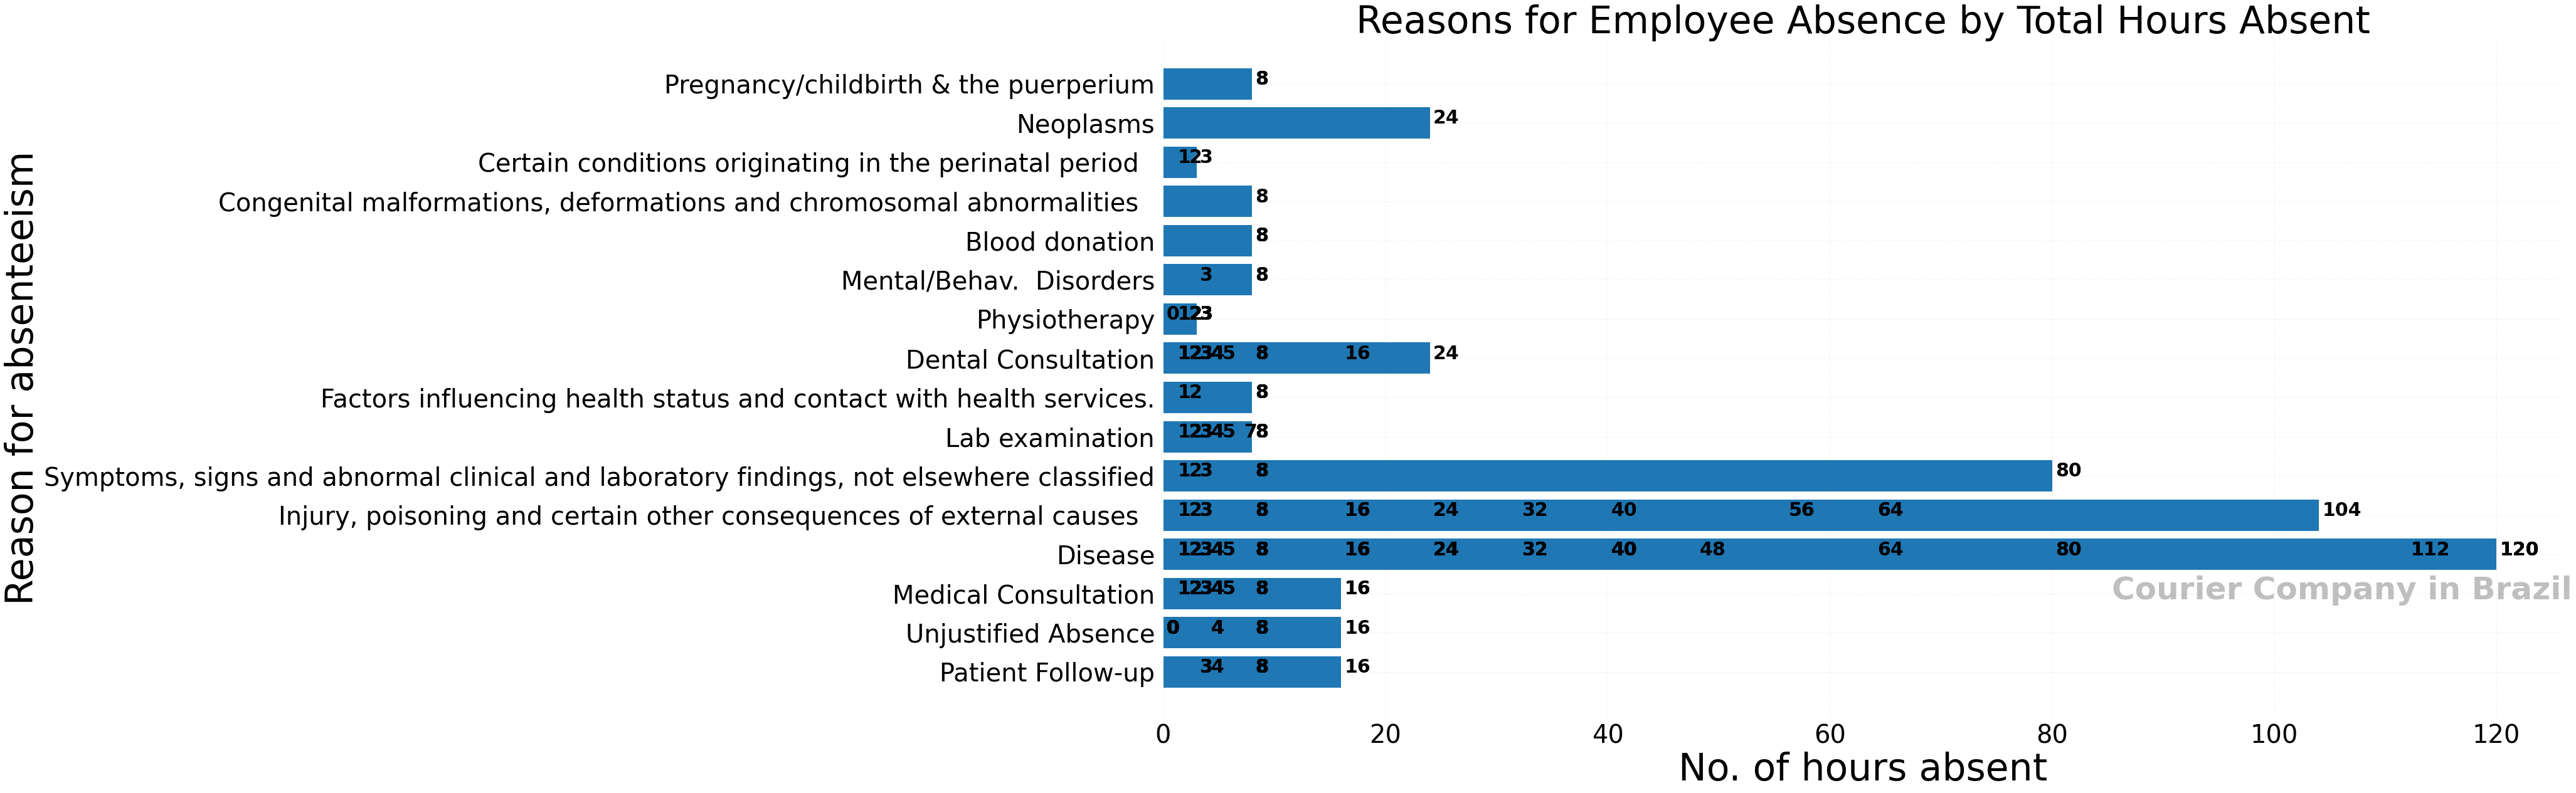

In [13]:
# df = pd.DataFrame(data)
# x = df["Reason"]
# y = df["AT"]

x = data["Reason"]
y = data["AT"]


# update default fontsize
plt.rcParams.update({"font.size": 40})

# plot graph by calling function
plot_barh(x, y)
    
# add plot title
plt.title("Reasons for Employee Absence by Total Hours Absent", fontsize = 60)

# add labels for x and y axis
plt.ylabel("Reason for absenteeism", fontsize = 60)
plt.xlabel("No. of hours absent", fontsize = 60)

         
#show plot
plt.show()
plt.close()
    

> The vertical bar chart above breaks down the absenteeism time in hours by the reason for the absence. We see that employees missed a total of 120 hours due to disease, followed by Injury, poisoing and certain other consequences of external causes. Physiotherapy and certain conditions originating in teh perinatal period had the least number of absences. 

In [14]:
# number of occurence for each Reason that resulted in employee absence
data["Reason"].value_counts()


Disease                                                                                    184
Medical Consultation                                                                       149
Dental Consultation                                                                        112
Unjustified Absence                                                                         74
Physiotherapy                                                                               69
Injury, poisoning and certain other consequences of external causes                         40
Patient Follow-up                                                                           38
Lab examination                                                                             31
Symptoms, signs and abnormal clinical and laboratory findings, not elsewhere classified     21
Factors influencing health status and contact with health services.                          6
Mental/Behav.  Disorders                          

> We see from the table that Disease, Medical and Dental consultations were the most frequently used Reason for absence. Let's plot this on a vertical bar chart.

Text(0.5, 0, 'Frequency')

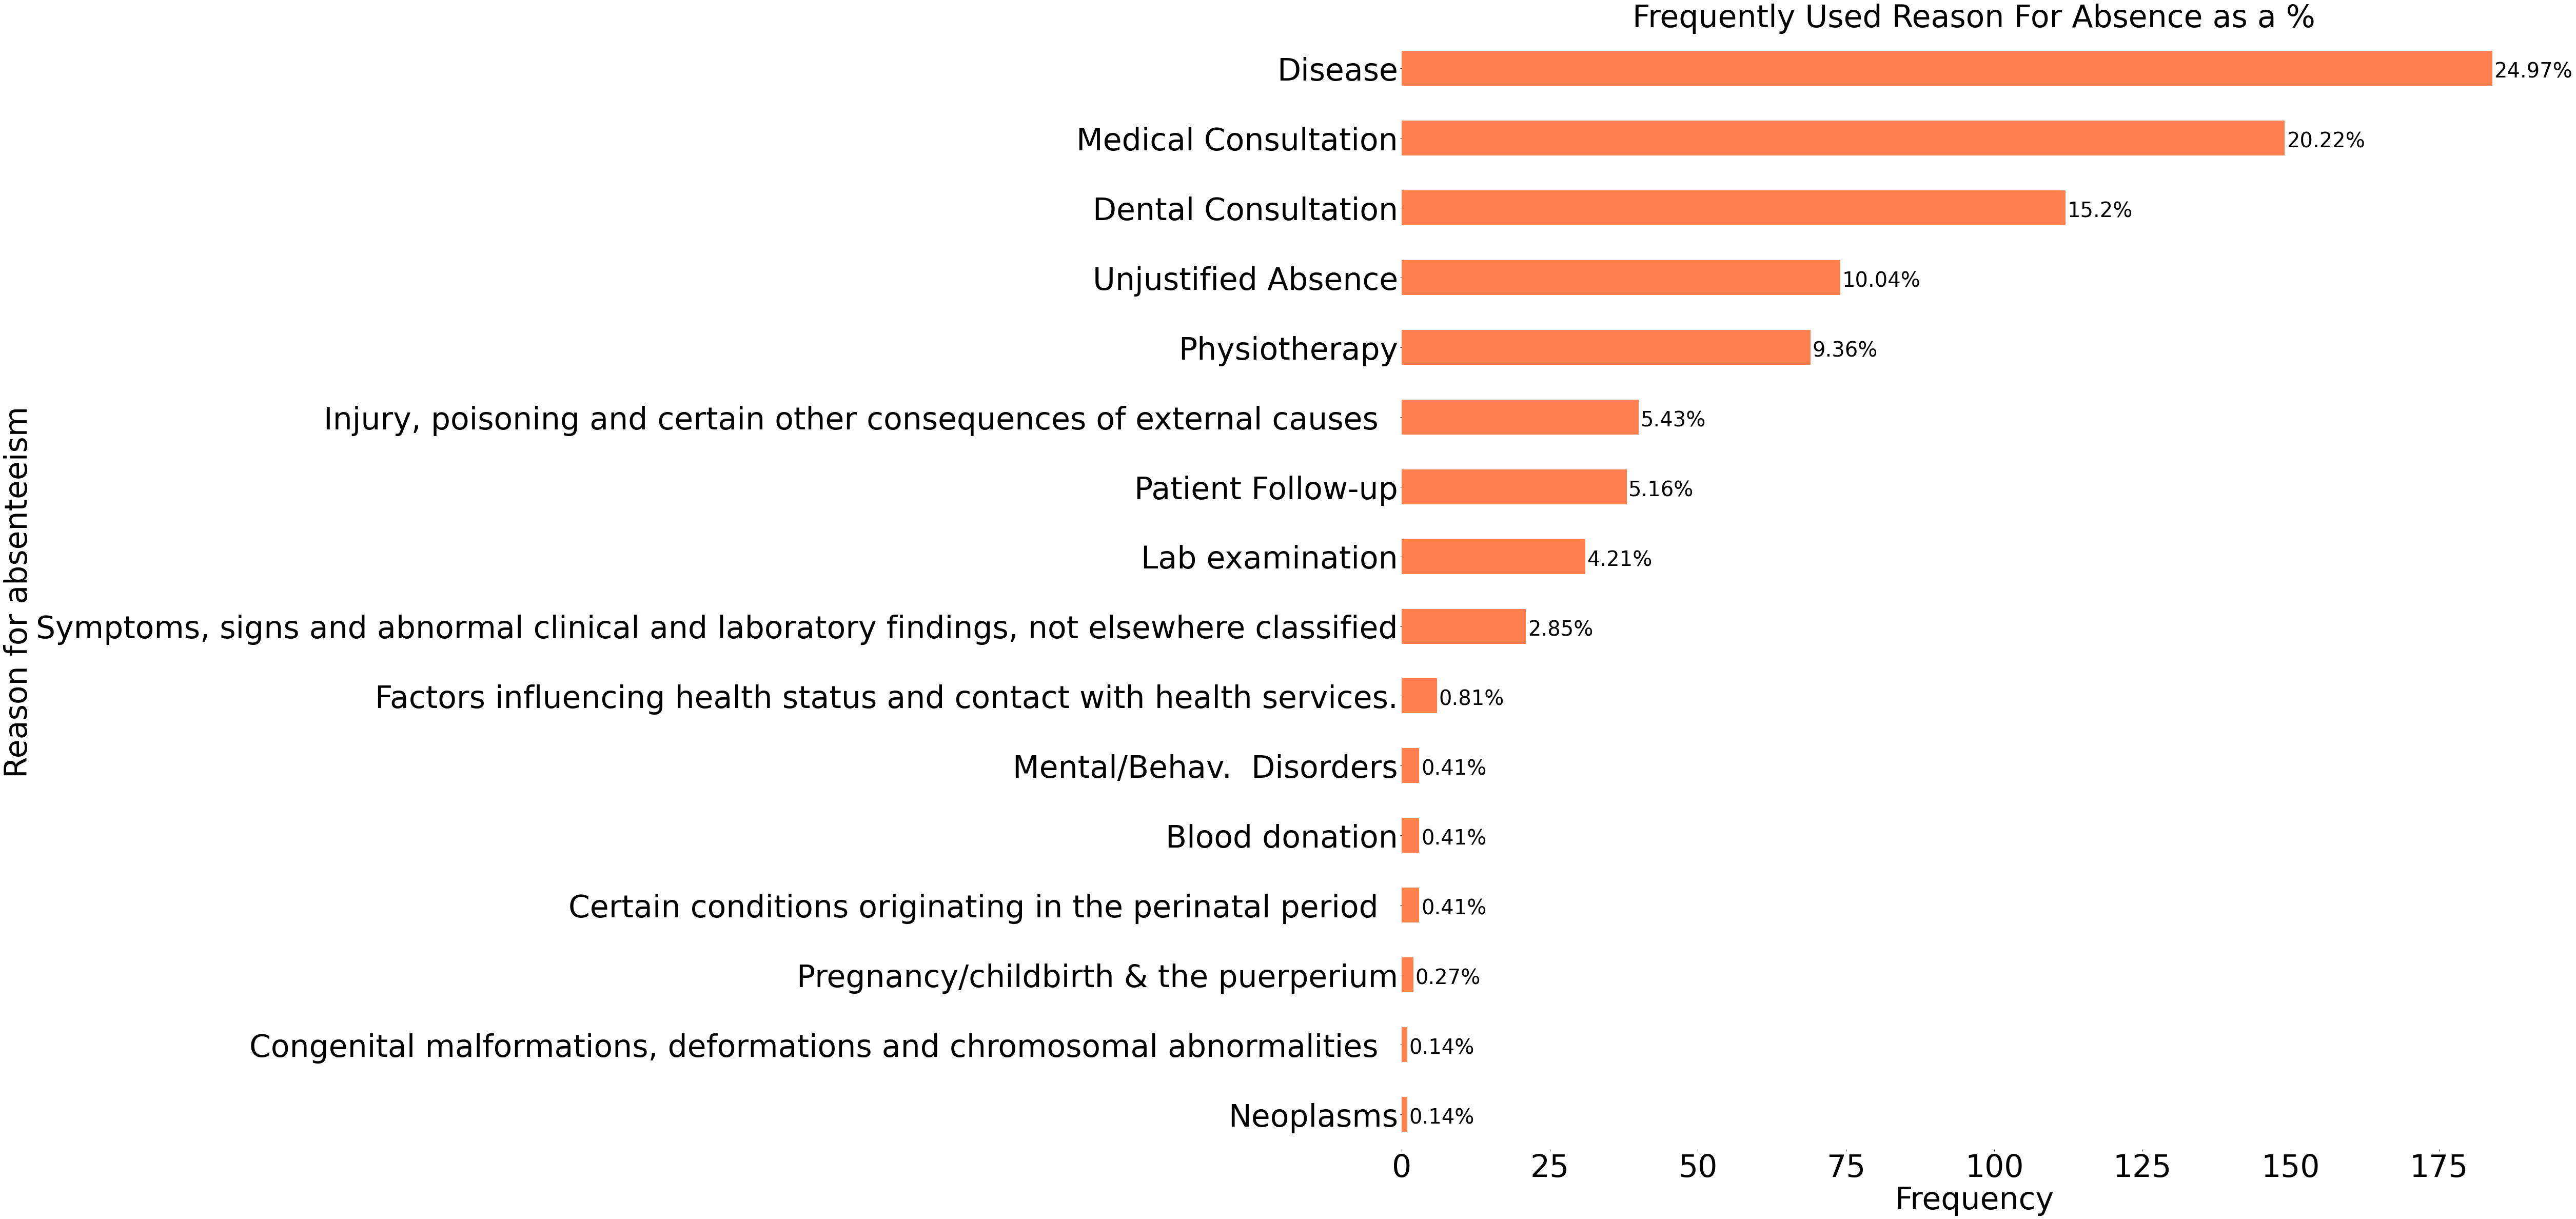

In [15]:
# now, let's plot the number of occurence of Reasons 

#plt.rcParams.update({"font.size": 60})
ax = data["Reason"].value_counts().plot(kind="barh", figsize =(40, 40), color="coral", fontsize = 60)
ax.set_alpha(0.2)

#add title
ax.set_title("Frequently Used Reason For Absence as a %", fontsize = 60)

# create a list to collect the plt.patches data
totals =[]

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_width())
    
# set individual bar labels using the above list    
    total = sum(totals)

# set individual bar labels using the above list
for i in ax.patches:
    
# get_width pulls left or right; get_y pushes up or down    
    ax.text(i.get_width() + 0.3, i.get_y() + 0.38, 
            str(round((i.get_width()/total) * 100, 2)) + "%", 
            fontsize= 40, color="black")
    
# invert for largest on top 
ax.invert_yaxis()

# remove axes splines
for s in ["top", "bottom", "left", "right"]:
    ax.spines[s].set_visible(False)

#data["Reason"].value_counts().plot(kind="barh", figsize = (40, 40), stacked = True)

# add labels for x and y axis
plt.ylabel("Reason for absenteeism", fontsize = 60)
plt.xlabel("Frequency", fontsize = 60)


Text(0.5, 0, 'Frequency')

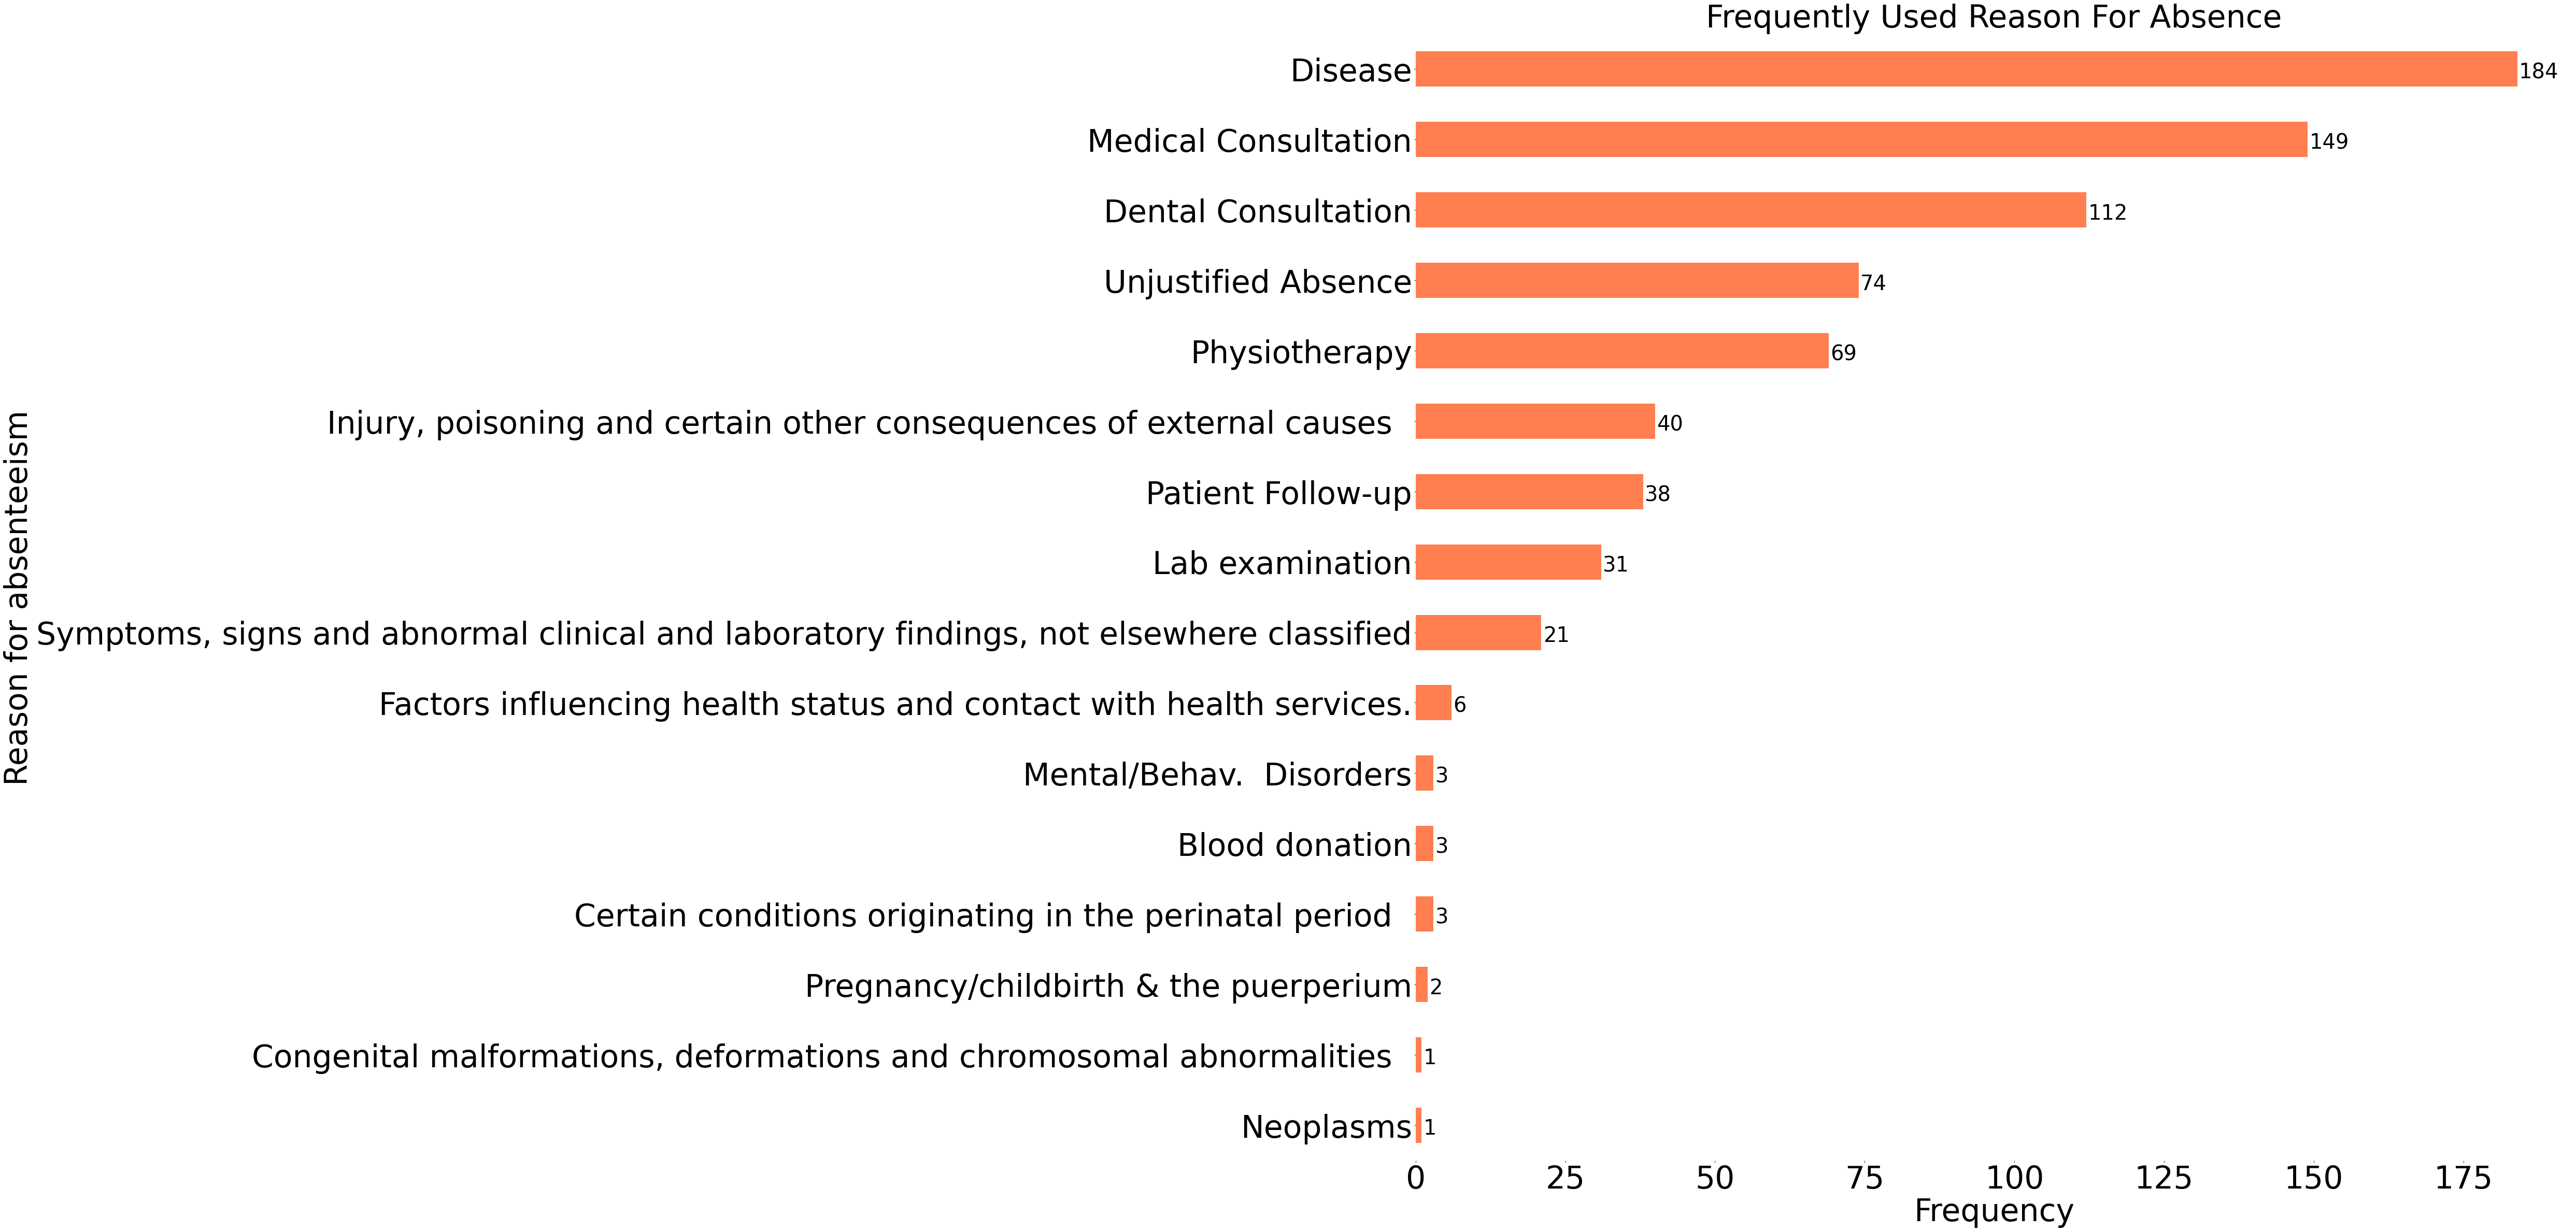

In [16]:
# Instead of percentages, let's plot the actual frequency of Reason for absence. 

ax = data["Reason"].value_counts().plot(kind="barh", figsize =(40, 40), color="coral", fontsize = 60)
ax.set_alpha(0.2)

#add title
ax.set_title("Frequently Used Reason For Absence", fontsize = 60)

# set individual bar labels using the above list
for i in ax.patches:
    
# get_width pulls left or right; get_y pushes up or down    
    ax.text(i.get_width() + 0.3, 
            i.get_y() + 0.38, 
            str(round((i.get_width()), 2)), 
                fontsize= 40, color="black")
            
# invert for largest on top 
ax.invert_yaxis()

# remove axes splines
for s in ["top", "bottom", "left", "right"]:
    ax.spines[s].set_visible(False)
    
#data["Reason"].value_counts().plot(kind="barh", figsize = (40, 40), stacked = True)

# add labels for x and y axis
plt.ylabel("Reason for absenteeism", fontsize = 60)
plt.xlabel("Frequency", fontsize = 60)

In [17]:
# x = data["Reason"]
# y = data["BMI"]


# # update default fontsize
# plt.rcParams.update({"font.size": 40})

# # plot graph by calling function
# plot_barh(x, y)
    
# # add plot title
# plt.title("Weight VS Reason for Absenteeism", fontsize = 60)

# # add labels for x and y axis
# plt.ylabel("Reason for absenteeism", fontsize = 60)
# plt.xlabel("No. of hours absent", fontsize = 60)

         
# #show plot
# plt.show()
# plt.close()



Text(0, 0.5, 'Reason for absenteeism')

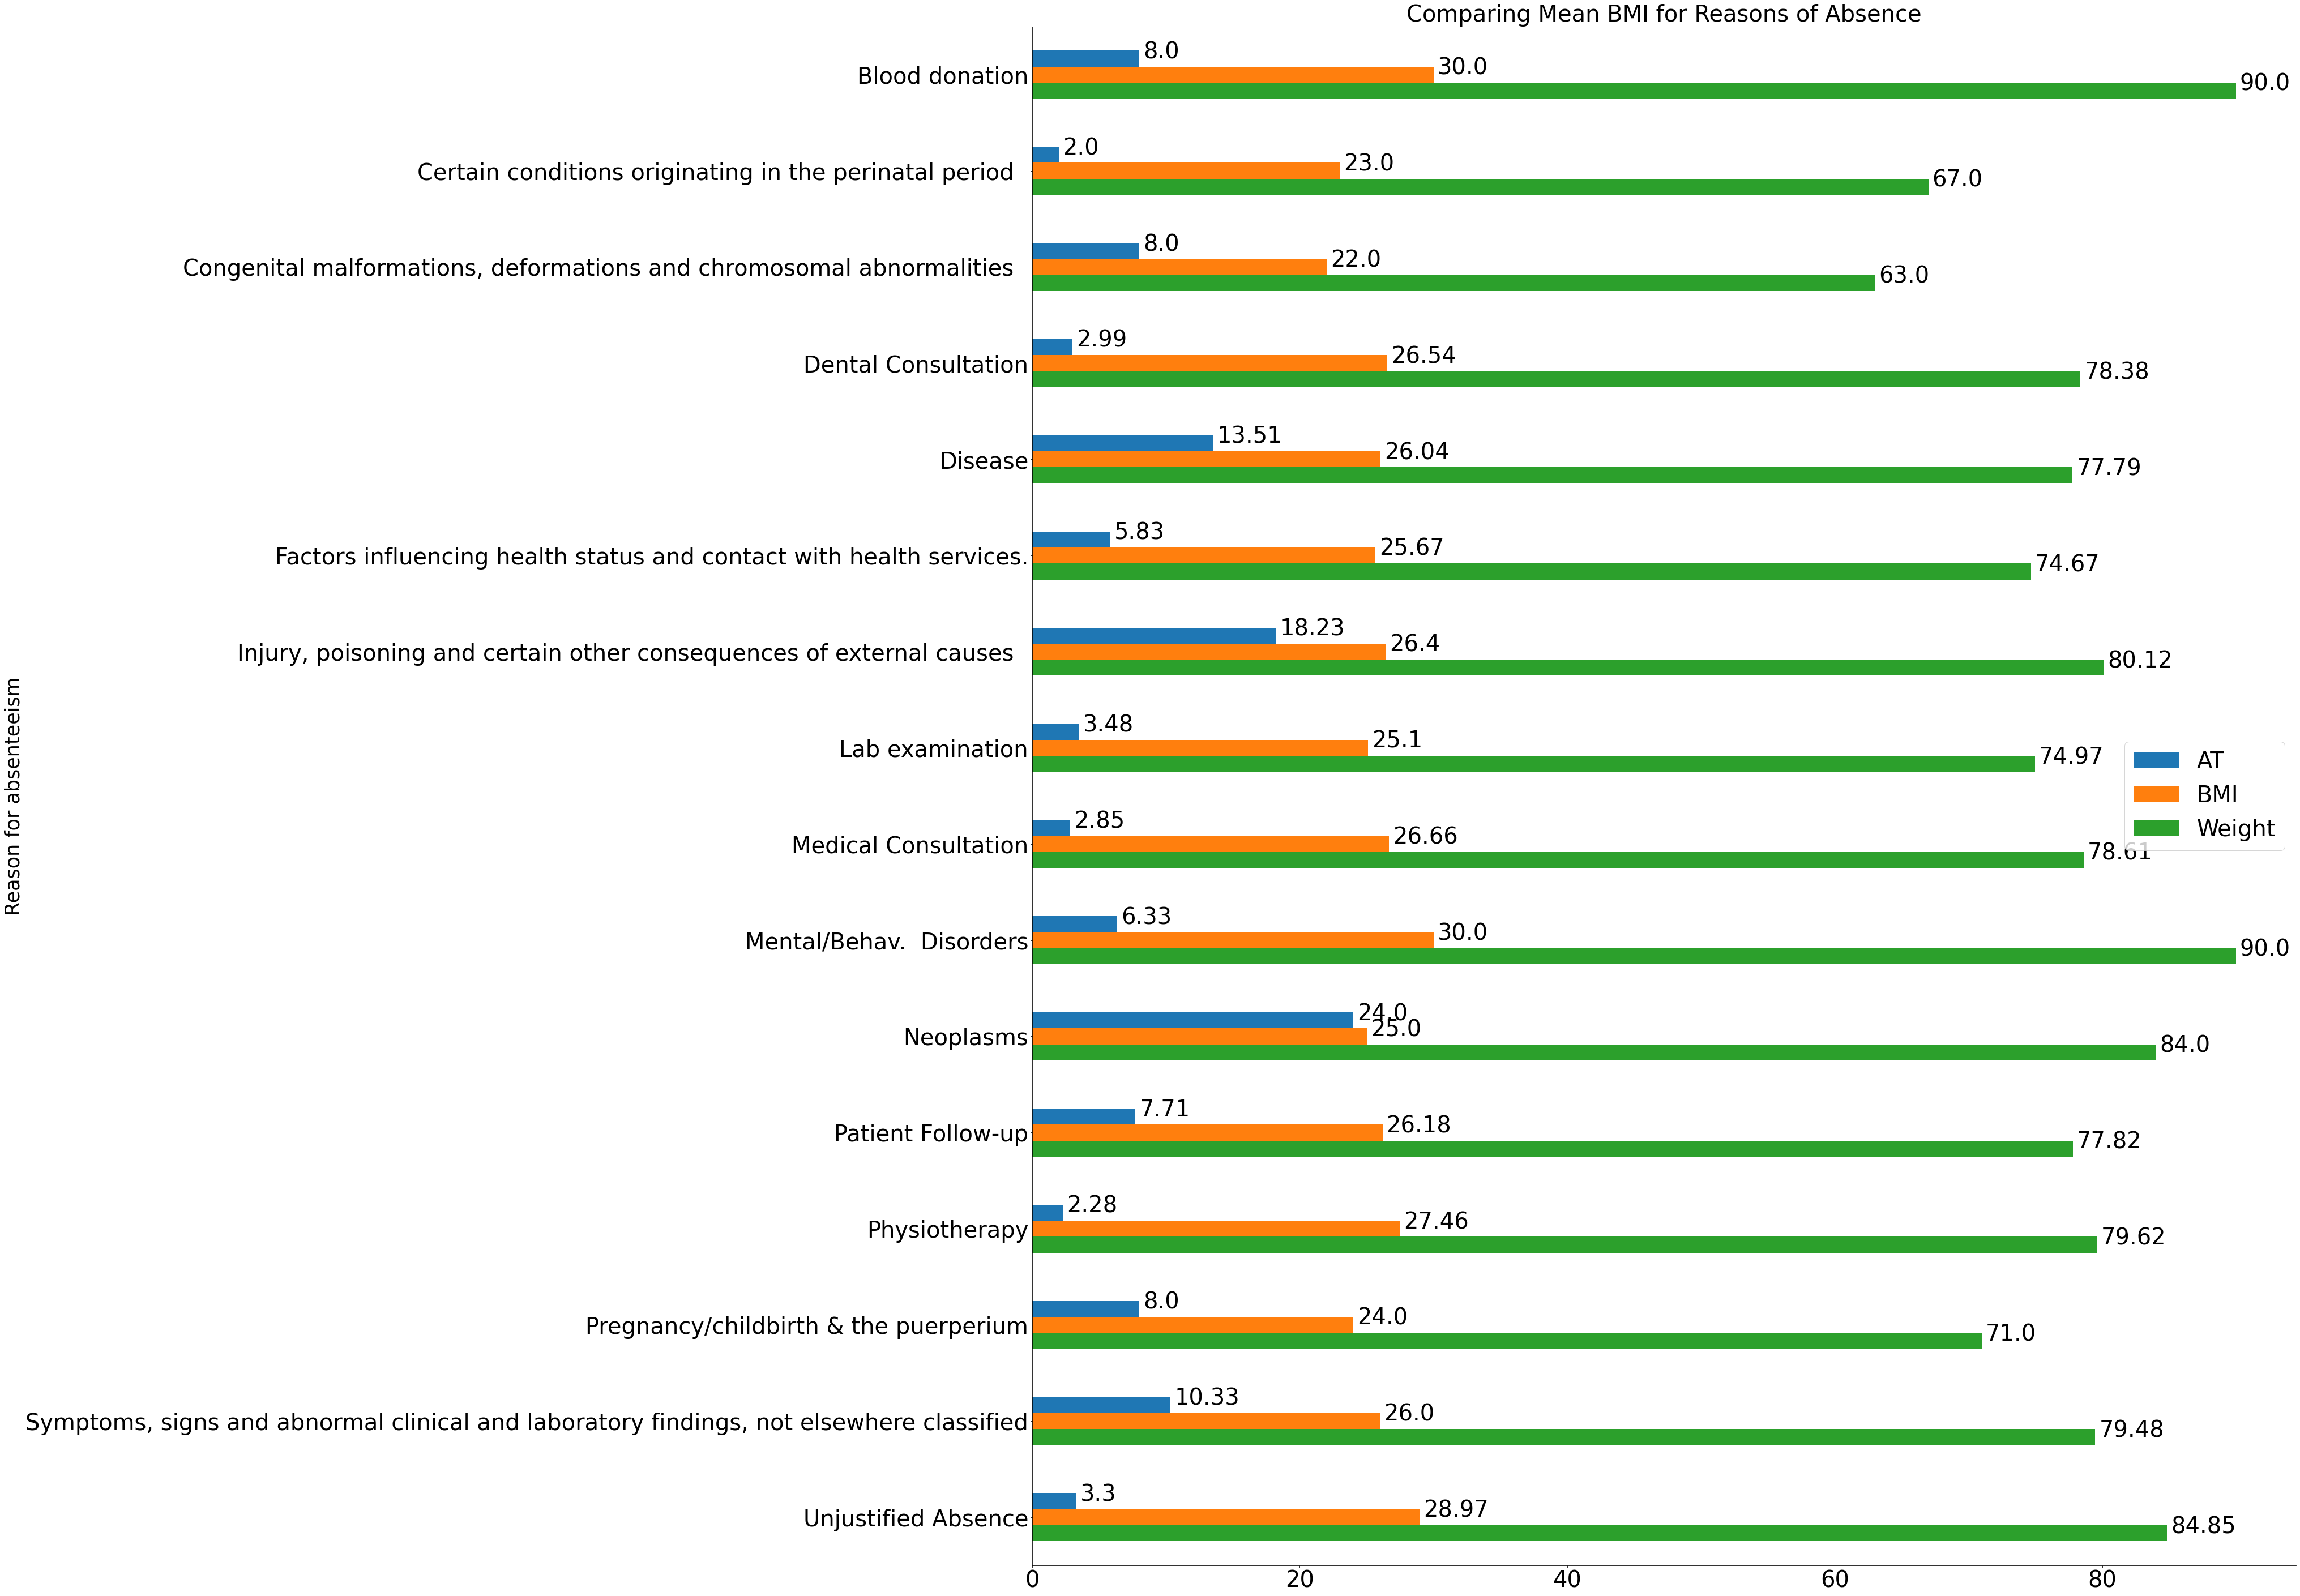

In [18]:
# choose columns to create a subset
sick_cols = data[["Reason","AT","BMI", "Weight"]]

# add index to subset
#sick_cols.set_index("Reason", inplace=True)

# select only rows that meet the defined criteria
#sick_df = sick_cols.loc[["Disease"]]

# reset default font size
plt.rcParams.update({"font.size": 40})

# create plot for clustered bar chart
ax = sick_cols.groupby("Reason").mean().plot.barh(figsize = (40,50), legend = False)


#ax = sick_cols.groupby("Reason").mean().loc[["Disease", "Medical Consultation"]].plot.barh()
#sick_df.plot(kind="bar", figsize =(40, 40), fontsize = 12)

# ax = sick_cols.groupby("Reason").mean().\
# loc[["Disease", "Medical Consultation", "Dental Consultation"]].plot(kind="barh",
#                                                                      figsize = (40,15),
#                                                                      #fontsize=30,
#                                                                      legend=False)
ax.set_alpha(0.2)
                                                                                

#add title
ax.set_title("Comparing Mean BMI for Reasons of Absence", fontsize = 40)

# set individual bar labels using the above list
for i in ax.patches:
    
# get_width pulls left or right; get_y pushes up or down    
    ax.text(i.get_width() + 0.3, 
            i.get_y() + 0.08, 
            str(round((i.get_width()), 2)), 
                fontsize= 40, color="black")
            
# invert for largest on top 
ax.invert_yaxis()

# remove axes splines
for s in ["top", "right"]:
    ax.spines[s].set_visible(False)
    
# add legend
plt.legend(loc = "best")
    
#data["Reason"].value_counts().plot(kind="barh", figsize = (40, 40), stacked = True)

# add labels for x and y axis
plt.ylabel("Reason for absenteeism", fontsize = 35)
#plt.xlabel("No. of hours absent", fontsize = 35)

> Disease, Medical and Dental consulations were the most frequently used Reason for absence. However, Medical and Dental consultations didn't yield much hours of absence. A possible reason for this is that employees came back to work after a medical or dental consulation. On the other hand, Disease had the most total hours of absenteeism most likely because employees can't return to work if they have a disease. So, they are likely to take longer hours off. Also note that the BMI and weight for employees who are absent from work due to a disease or medical consultation is above the ideal score of 18.5 to 24.9 range for adults. Althougth the visualizations above dont' indicate any correlation between BMI/weight and disease which makes it hard to conclude that overweight is a reason for people being sick, these figures could still provide a foundation for the company to dig deeper to find a way to reduce the number of absence. 

 > According to the CDC, BMI below 18.5 is considered underweight, BMI between 18.5 and 24.9 is considered normal or healthy weight, BMI between 25 and 29.9 is considered overweight and BMI of 30 and above is considered obese. A majority of the employees as seen in the diagram above fall under the overweight and obese category so the company can take measures to promote a healthy lifestyle to decrease these values.

Unjustified absence is also a relatively frequent reason for absence. The HR department would need to take a closer look into why employees have frequent unjustified absences. 

In [19]:
#data.to_csv("Absenteeism_at_work_revised.csv", index=False)

In [20]:
#data = pd.read_csv("Absenteeism_at_work_revised.csv")
#df = pd.DataFrame(data)

The data set shows there are justified and unjustified absences. We want to explore the data to see how frequent employees take unjustified absences. Since there are only 2 variables (unjustified and justified), using a pie chart is ideal in this case.

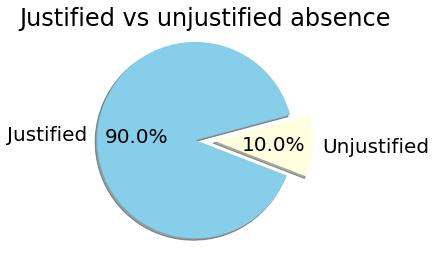

In [21]:
# let's plot a pie chart for justified vs unjustified absence

# update default font size
plt.rcParams.update({"font.size": 20})

# chose the column for which we want to plot the pie chart
# since this is a categorical variable, we want to get the counts for each variable
absence = data["Justified_Absence"].value_counts()

# set the labels
abs_labels = "Justified", "Unjustified"

# chose pie colors
abs_colors = ["skyblue", "lightyellow"]

# set pie to explode
abs_explode = (0.1, 0.1) 

# plot the pie chart
plt.pie (absence, labels=abs_labels, autopct='%1.1f%%', 
         startangle=15, shadow=True,
         colors = abs_colors, explode=abs_explode)

# add a title
plt.title("Justified vs unjustified absence")
plt.axis("equal")
plt.show()
plt.close()

So, 10% of the times employees don't show up to work, their absence is unjustified which means, they don't call prior to state a reason for their absence. If this value is too  high, the company might want to take measures such as establishing stricter policies on absenteeism or intentionally educating their employees on the need to provide a prior notice of absence. 
> Let's see the actual number of hours employees are absent for unjustified vs justified reasons

Text(0.5, 0, 'Frequency')

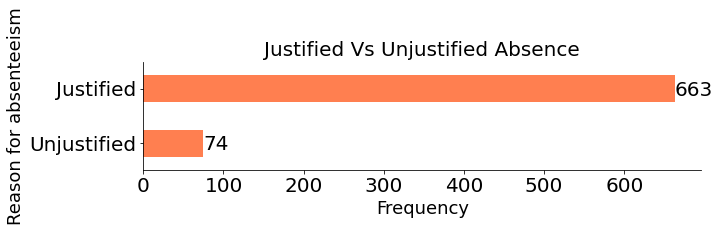

In [22]:
ax = data["Justified_Absence"].value_counts().plot(kind="barh", figsize =(10, 2), color="coral", fontsize = 20)
ax.set_alpha(0.2)

#add title
ax.set_title("Justified Vs Unjustified Absence", fontsize = 20)

# set individual bar labels using the above list
for i in ax.patches:
    
# get_width pulls left or right; get_y pushes up or down    
    ax.text(i.get_width() + 0.3, 
            i.get_y() + 0.38, 
            str(round((i.get_width()), 2)), 
                fontsize= 20, color="black")
            
# invert for largest on top 
ax.invert_yaxis()

# remove axes splines
for s in ["top", 
          #"bottom", 
          #"left", 
          "right"]:
    ax.spines[s].set_visible(False)
    
#data["Reason"].value_counts().plot(kind="barh", figsize = (40, 40), stacked = True)

# add labels for x and y axis
plt.ylabel("Reason for absenteeism", fontsize = 18)
plt.xlabel("Frequency", fontsize = 18)

#### Results and Interpretation of Descriptive Analysis
The dataset contained number of hours absent of 36 unique employees over a span of 3 years. The data contains a total of 737 records and 19 attributes. Here's what we found:

1. Most employees gave "Disease" as a reason for being absent.
2. A majority of the employees are considered overweight or obese according to the [CDC](https://www.cdc.gov/healthyweight/assessing/bmi/adult_bmi/index.html). 
2. 10 percent of instances where employees were absent was unjustified.
3. Mondays, the month of March and Spring recorded the most number of absences.
4. Employees with a high school diploma recorded the most number of absences compared to employees with other levels of education. 
5. Employees who report a Disease or Medical consulation as a reason for being absent also recorded one of the highest BMIs. 

> The above information provides a good foundation for the company's HR department to get a better understanding of their work force and how to reduce absenteeism. If most employees miss work because they're sick or injured, what's causing it? Does the company need to provide better health insurance or encourage a safer work environment or healthier lifestyle? Does the company need to invest in seminars and other eductional programs to better educate it's work force? Does the company need to revise it's policies as it relates to absenteeism? The company can now find answers to these questions. 

## 2. Predictive Analytics

Now, let's run an LR model to see if there's any significant causal relationship between number of hours absent and the other numeric variables. I'll start by plotting a correlation matrix.  

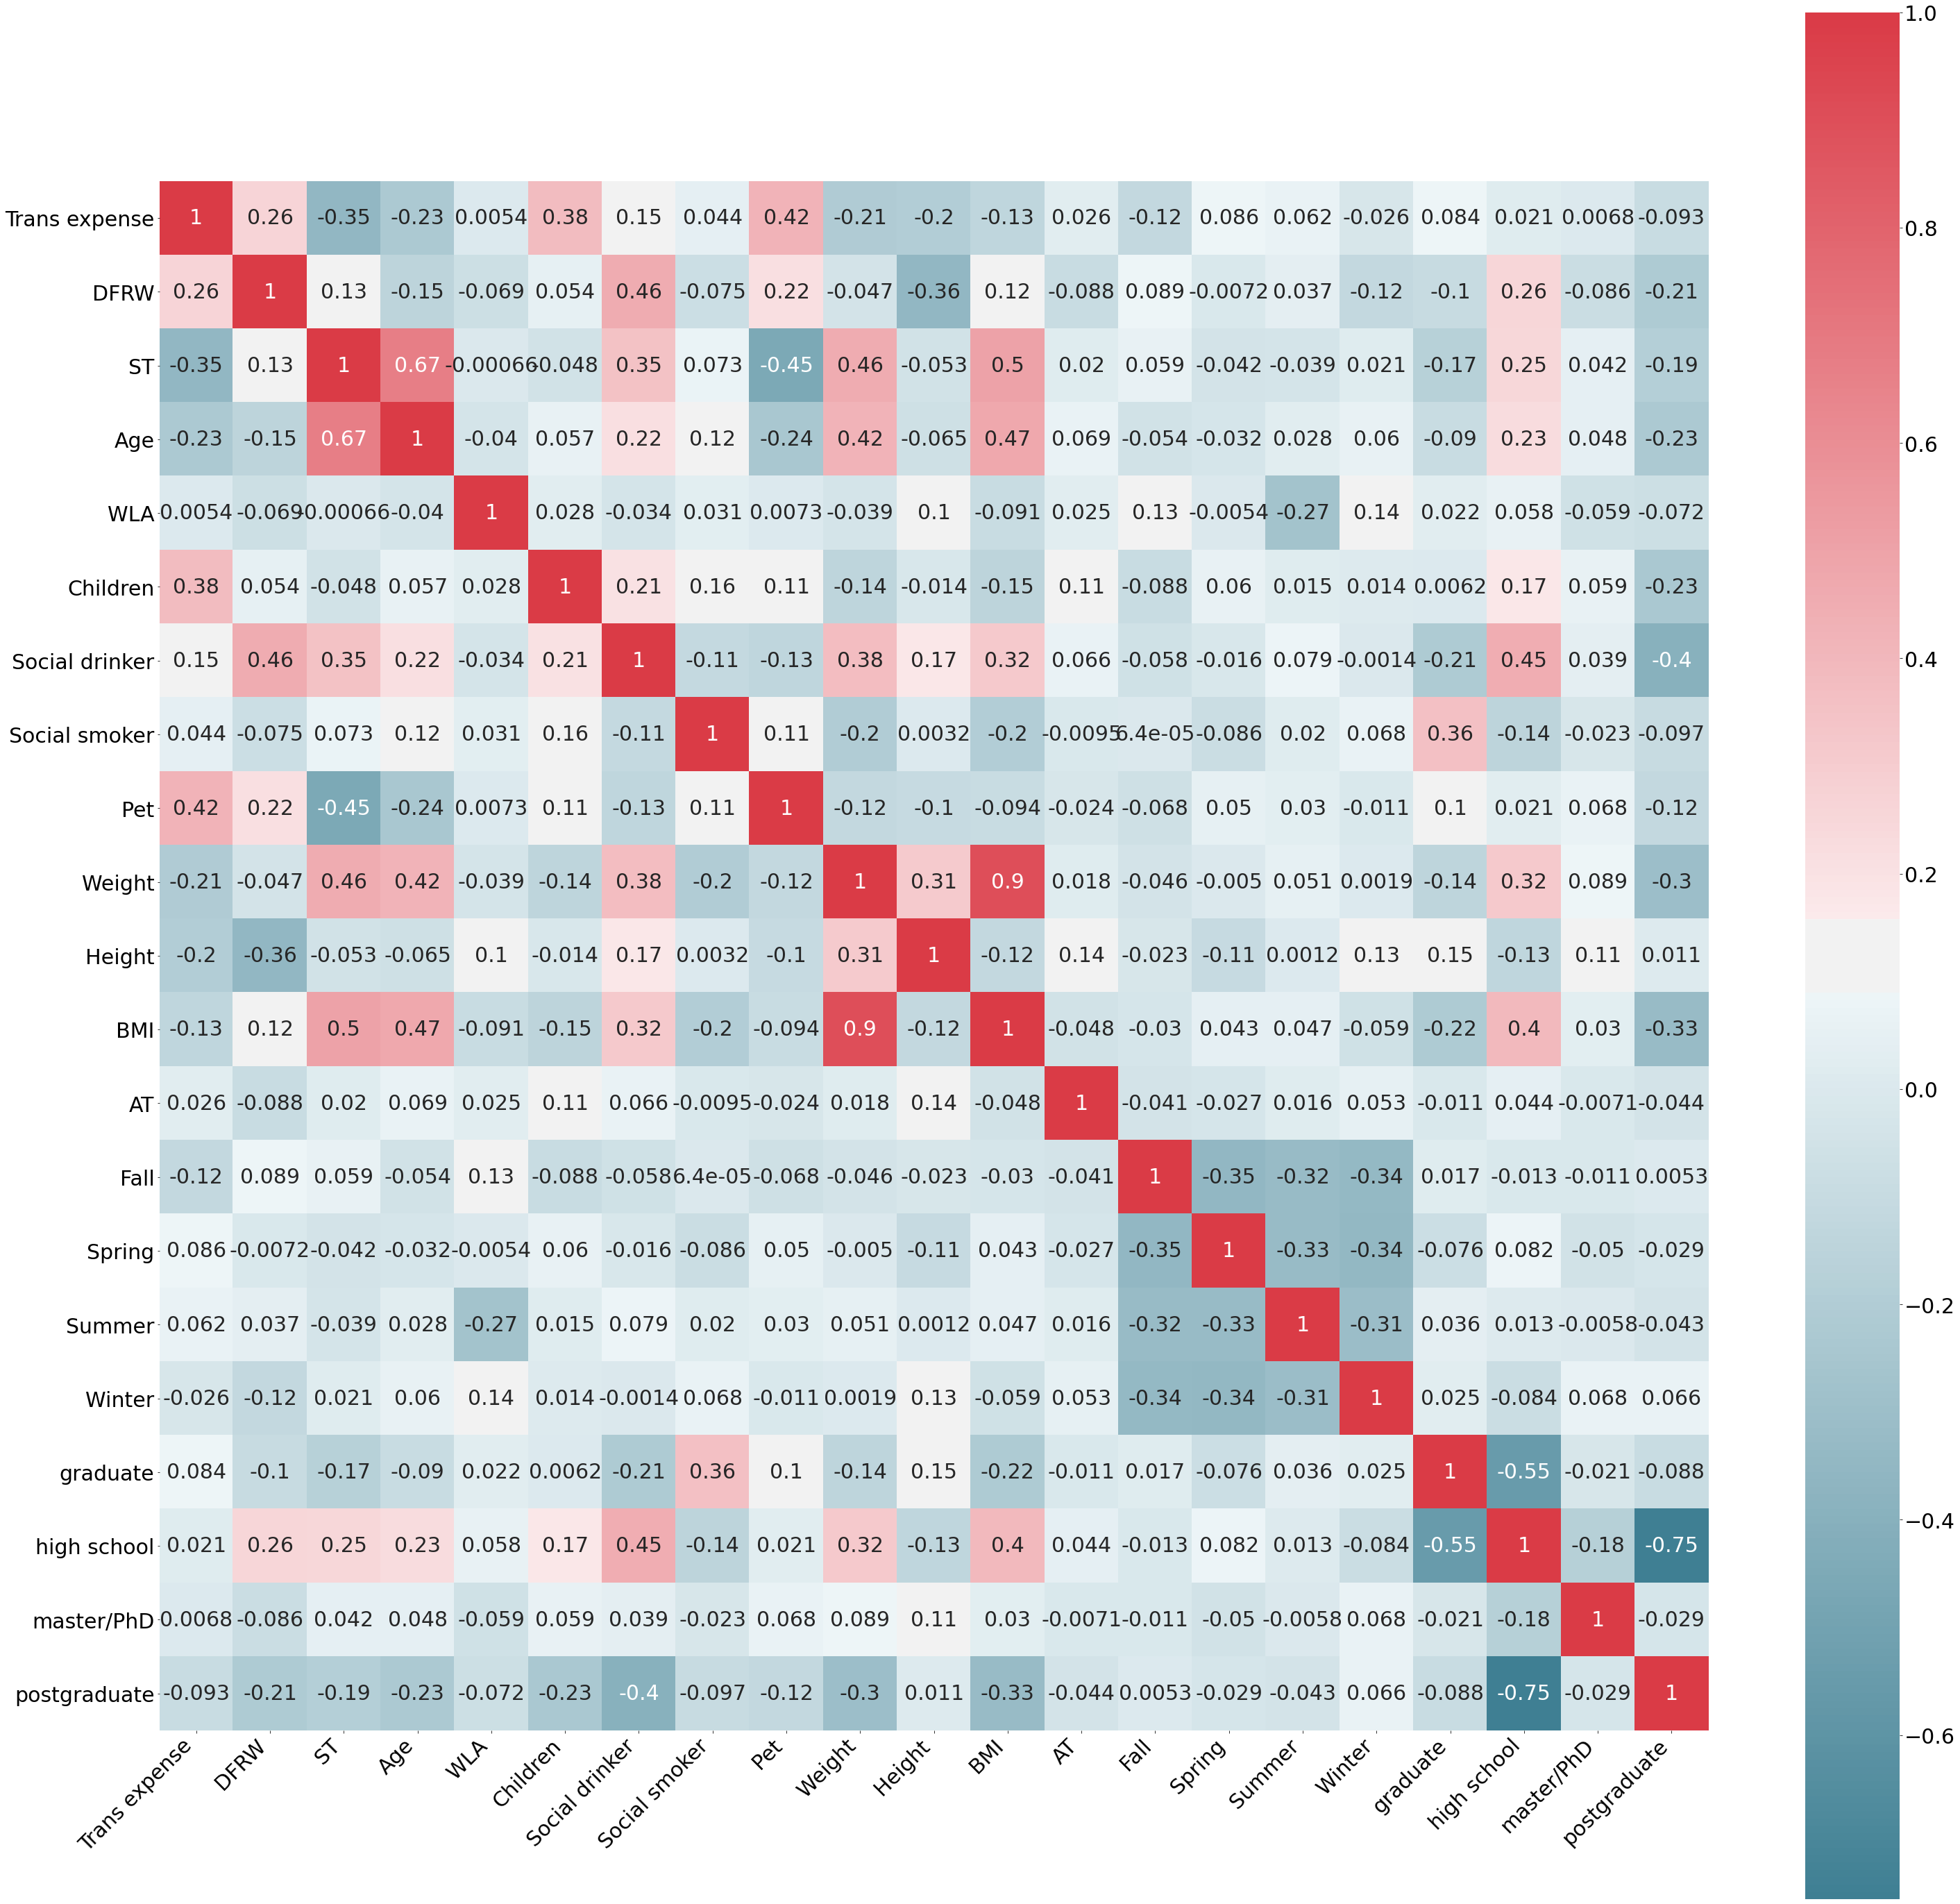

In [23]:
import seaborn as sn

# # create a subset of columns
#sick_cols = data[["Reason", "BMI", "Weight", "AT"]]

# # select only rows that meet the defined criteria
#sick_df = sick_cols.loc[sick_cols["Reason"]=="Disease"]
# corrMatrix = sick_df.corr()
# sn.heatmap(corrMatrix, annot = True)
# plt.show()

# set default font size
plt.rcParams.update({"font.size": 30})

fig, ax = plt.subplots(figsize=(50, 50))
corr = data.corr()
sn.heatmap(corr, annot = True, mask=np.zeros_like(corr, dtype=np.bool), 
           cmap=sn.diverging_palette(220, 10, as_cmap=True),
           square=True, ax = ax)

# rotate values on x-axis to an angle of 45 degrees    
ax.set_xticklabels(ax.get_xticklabels(),
                   rotation = 45,
                   horizontalalignment = "right") 
plt.show() 
plt.close() 

The above correlation matrix shows the relationship between each variable (columns). We see a few relatively strong relationships between columns. We see that BMI and Weight both have a strong positive relationship (0.9) which is expected. Weight also has a strong positive relationship with service time (ST), Age and Social drinker. Interestingly, the number of pets an employee has and the transportation expense from home to work has a relatively high positive relationship (compared to other columns). 

Notice that no one particulary column has a strong correlation with AT (Absenteeism time) which is our dependent variable. However, the above correlation only shows 1 to 1 correlation. Combining more than one column might give a stronger causal relation with AT. We'll use an OLS model to use multiple columns to determine its impact on AT. 

In [24]:
# import our previously created Regression functions
from regression import Regression

# create an instance of the regression class
reg = Regression() 
reg
        

You created an instance of Stats


In [25]:
#define the independent variable, y_var
y_var = ["AT"]

# define our dependent variables, x_var
x_vars = ["Trans expense", "DFRW", "ST", "Age", "WLA", "Children", "Social drinker", "Social smoker", "Pet",
         "BMI", "Fall", "Spring", "Summer", "Winter", "graduate", "high school", "master/PhD", "postgraduate"]
#"graduate", "high school", "master/PhD", "postgraduate"]
#data.corr()

# now, let's call an instance of the OLS function which is part of the regression class
reg.OLS(reg_name = "Absenteeism", data = data, y_name = y_var, beta_names = x_vars)

C:\Users\0\desktop\econ_611\jupyter\Final_Class_Project\regression.py:163: RuntimeWarning: invalid value encountered in double_scalars
  results.loc[var]["SE"] = self.cov_matrix[var][var] ** (1/2)
C:\Users\0\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)
C:\Users\0\desktop\econ_611\jupyter\Final_Class_Project\regression.py:166: RuntimeWarning: divide by zero encountered in double_scalars
  results.loc[var]["t-stat"] = results["Coefficient"][var] / results["SE"][var]


In [26]:
reg.data

,Reason,Justified_Absence,Month,Day,Season,Trans expense,DFRW,ST,Age,WLA,...,Fall,Spring,Summer,Winter,graduate,high school,master/PhD,postgraduate,Constant,ATestimator
0,Patient Follow-up,Justified,Jul,Mon,Summer,235,11,14,37,239554,...,0,0,1,0,0,0,1,0,1,-2878.205804
1,Unjustified Absence,Unjustified,Jul,Tue,Summer,118,13,18,50,239554,...,0,0,1,0,0,1,0,0,1,-1638.709567
2,Medical Consultation,Justified,Aug,Thur,Summer,235,11,14,37,205917,...,0,0,1,0,0,0,0,1,1,-2776.014425
3,Unjustified Absence,Unjustified,Dec,Wed,Spring,235,11,14,37,261306,...,0,1,0,0,0,0,0,1,1,-1814.902979
4,Disease,Justified,Apr,Fri,Winter,235,11,14,37,326452,...,0,0,0,1,0,0,0,1,1,-1888.869611
5,Disease,Justified,June,Fri,Winter,235,11,14,37,377550,...,0,0,0,1,0,0,0,1,1,-1946.886173
6,Medical Consultation,Justified,Aug,Tue,Summer,235,11,14,37,265615,...,0,0,1,0,0,0,0,1,1,-2843.795409
7,"Injury, poisoning and certain other consequenc...",Justified,Aug,Thur,Summer,235,11,14,37,265615,...,0,0,1,0,0,0,0,1,1,-2843.795409
8,Unjustified Absence,Unjustified,Oct,Mon,Spring,235,11,14,37,265017,...,0,1,0,0,0,0,0,1,1,-1819.116441
9,"Symptoms, signs and abnormal clinical and labo...",Justified,Nov,Wed,Spring,235,11,14,37,284031,...,0,1,0,0,0,0,0,1,1,-1840.704897


In [27]:
reg.estimates

,Coefficient,SE,t-stat,p-value,signficance
y = AT,,,,,
Trans expense,-11.431565,1.105241,-10.343052,0.00000,***
DFRW,79.231293,5.283784,14.995179,0.00000,***
ST,32.395830,23.707880,1.366458,0.17222,
Age,-33.060885,13.738357,-2.406466,0.01636,*
WLA,-0.001135,0.001558,-0.728667,0.46644,
Children,21.228762,61.598751,0.344630,0.73047,
Social drinker,36.013307,159.485771,0.225809,0.82141,
Social smoker,-346.822095,257.836782,-1.345123,0.17901,
Pet,21.998371,59.284110,0.371067,0.71070,


Based on our LR model, Trans Expense, DFRW, Age and master/Phd have a PV value of 0.05 or less meaning they have a significant causal relationship with the number of hours of absence. Let's look at the performance of the aboves model in explaining changes in AT.


In [28]:
reg.stats_DF

,Estimation Statistics
r**2,1.316501e+04
adj r**2,-1.351330e+04
f-stat,-3.994141e+01
Est Var,2.405570e+06
rootMSE,1.550990e+03
SSE,1.729605e+09
SSR,1.727082e+09
SST,1.311873e+05
Obs.,7.380000e+02
DOF,7.190000e+02


The adjusted $R^2$ and joint F-test is used to evaluate the model. 
> The adjusted R-squared increases only if the variables improves the model more than would be expected by chance. It decreases when a predictor improves the model by less than expected by chance. The model has an R-squared which is greater than 1 which means it has no logical meaning. So, I'll review the model and remove some variables.

In [29]:
#define the independent variable, y_var
y_var = ["AT"]

# define our dependent variables, x_var
x_vars = ["Trans expense", "DFRW", "ST", "Age", "WLA", "Children", "Social drinker", 
          "Social smoker", "Pet", "BMI", "high school"]

#"Trans expense", "DFRW", "WLA", "Social drinker"]

#data.corr()

# now, let's call an instance of the OLS function which is part of the regression class
reg.OLS(reg_name = "Absenteeism", data = data, y_name = y_var, beta_names = x_vars)
reg.data

,Reason,Justified_Absence,Month,Day,Season,Trans expense,DFRW,ST,Age,WLA,...,Fall,Spring,Summer,Winter,graduate,high school,master/PhD,postgraduate,Constant,ATestimator
0,Patient Follow-up,Justified,Jul,Mon,Summer,235,11,14,37,239554,...,0,0,1,0,0,0,1,0,1,6.375977
1,Unjustified Absence,Unjustified,Jul,Tue,Summer,118,13,18,50,239554,...,0,0,1,0,0,1,0,0,1,10.836397
2,Medical Consultation,Justified,Aug,Thur,Summer,235,11,14,37,205917,...,0,0,1,0,0,0,0,1,1,6.302360
3,Unjustified Absence,Unjustified,Dec,Wed,Spring,235,11,14,37,261306,...,0,1,0,0,0,0,0,1,1,6.423582
4,Disease,Justified,Apr,Fri,Winter,235,11,14,37,326452,...,0,0,0,1,0,0,0,1,1,6.566158
5,Disease,Justified,June,Fri,Winter,235,11,14,37,377550,...,0,0,0,1,0,0,0,1,1,6.677989
6,Medical Consultation,Justified,Aug,Tue,Summer,235,11,14,37,265615,...,0,0,1,0,0,0,0,1,1,6.433013
7,"Injury, poisoning and certain other consequenc...",Justified,Aug,Thur,Summer,235,11,14,37,265615,...,0,0,1,0,0,0,0,1,1,6.433013
8,Unjustified Absence,Unjustified,Oct,Mon,Spring,235,11,14,37,265017,...,0,1,0,0,0,0,0,1,1,6.431704
9,"Symptoms, signs and abnormal clinical and labo...",Justified,Nov,Wed,Spring,235,11,14,37,284031,...,0,1,0,0,0,0,0,1,1,6.473317


In [30]:
reg.estimates

,Coefficient,SE,t-stat,p-value,signficance
y = AT,,,,,
Trans expense,0.004338,0.009327,0.465090,0.64201,
DFRW,-0.136329,0.043799,-3.112625,0.00193,**
ST,0.134035,0.198221,0.676192,0.49913,
Age,0.120354,0.116014,1.037404,0.29989,
WLA,0.000002,0.000013,0.173197,0.86255,
Children,0.852698,0.518454,1.644693,0.10047,
Social drinker,2.987561,1.320203,2.262956,0.02393,*
Social smoker,-2.753489,2.049296,-1.343627,0.17949,
Pet,0.355385,0.492428,0.721701,0.47071,


In [31]:
reg.stats_DF

,Estimation Statistics
r**2,0.041473
adj r**2,0.026950
f-stat,2.855641
Est Var,173.204715
rootMSE,13.160726
SSE,125746.622804
SSR,5440.715052
SST,131187.337856
Obs.,738.000000
DOF,726.000000


Now we have more realistic results. We see an adjusted $R^2$ of 0.027 and $R^2$ of 0.041 which means that $4.1$% change in AT is explained by the variables in the model. Now I'll run the model again using just the variables that are significant to the model (P-values of 0.5 or less) then I'll use an F-Test to compare the full model with the sub model to determine if the variables in the sub model are signicant when taken together. 

In [32]:
# reg.reg_history

In [33]:
# save summary stats of current model to csv
pd.DataFrame.from_dict(data=reg.reg_history, orient = "index").to_csv("regsummarystats.csv", header=False)

In [34]:
y_var = ["AT"]  
x_vars_unrestricted = ["Trans expense", "DFRW", "ST", "Age", "WLA", "Children", "Social drinker", 
                       "Social smoker", "Pet", "BMI"]
#
x_vars_restricted = ["Trans expense", "ST", "Age", "WLA", "Children", "Social smoker", "Pet"]

reg.OLS("Absenteeism Unrestricted", data, y_var, x_vars_unrestricted)  
reg.OLS("Absenteeism Restricted", data, y_var, x_vars_restricted)  
  
joint_f_test = reg.joint_f_test("Absenteeism Unrestricted",   
                                "Absenteeism Restricted")  
joint_f_test.to_csv("Joint F_test; y = " + reg.y_name[0] + "; " +\
                    joint_f_test.index.name + ".csv")
joint_f_test

,
DFRW = Social drinker = BMI = 0,
f-stat,5.117195
p-value,0.001652
dfn,3.000000
dfd,726.000000


$H0$: DFRW = Social drinker = BMI = 0,

$H1$: Atleast one of the variables != 0

$F{^3} _{726}$, 0.05 = 2.617 (calculated using F-table)

calculated F-stats = 5.117 (returned by our model)

Conclusion: Since 5.117 > 2.617, we reject the null hypothesis ($H0$)
Intepretation: There's enough evidence to say that DFRW, Social Drinker and BMI are significant to the model when taken together. 

#### Results and Interpretation of Predictive Analysis:

From our OLS model, DFRW, BMI and Social Drinker have a correlation with absenteeism. Going back to the correlation matrix above, we can see that there are other variables that are correlated with these variables. For example, employees with high school diploma and social drinkers are correlated, transfortation expense is correlated with DFRW, weight is correlated with BMI, etc. Comparing this with the descriptive analysis, Disease was the number 1 reason for absence. Those who frequently reported disease as a reason for being absent also had the highest BMI. Social drinkers also have a high BMI according to the correlation Matrix.  

#### Recommendation

My recommendation is to:
1. Evaluate the company's health insurance policies to make sure employees have access to affordable preventive programs.
2. Evaluate company policy on unexcused/unjustified absences and educate employees accordingly.
3. It migth be expensive to create housing plans that will enable employees to live closer to the workplace but the company can provide transportation or negotiate with a transportation agency to provide cheaper transportation to it's employees. This will reduce the cost of transportation from home to work. Since Trans Expense and DFRW are correlated, reducing Trans Expense will positively affect DFRW which will intern affect AT. 
4. Create a work environment that promotes a healthy lifestyle. The company can achieve this by organizing seminars and info sessions on the importance of living healthy and the dangers of binge drinking. If employees start living healthy and exercise, their BMIs will improve, they'll be less sick and less absent from work. 
5. High schoolers reported the highest number of absences and they too are more prone to social drinking. The company can organize mentorship programs where younger and less experienced employees can be mentored by more experienced veteran employees.

In [35]:
# # Load libraries
# import pandas as pd

# # Import Decision Tree Classifier
# from sklearn.tree import DecisionTreeClassifier 
# # Import train_test_split function
# from sklearn.model_selection import train_test_split 
# #Import scikit-learn metrics module for accuracy calculation
# from sklearn import metrics 
# #from sklearn import linear_model


# # y = data[["AT"]]
# # X = data[["ST", "Reason_C"]]
# # lm = linear_model.LinearRegression()
# # model = lm.fit(X,y)

# # predictions = lm.predict(X)
# # predictions[0:5]


# feature_cols = ["Trans expense", "DFRW", "ST", "Age", "WLA", "Children", 
#                 "Social drinker", "Social smoker", "Pet", "BMI"]
# X = data[feature_cols]
# y = data["AT"]

# # Split dataset into training set and test set
# # 70% training and 30% test
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.6, random_state=1) 

# print(X_train.shape, y_train.shape)
# print(X_test.shape, y_test.shape)

# from sklearn.linear_model import LinearRegression
# # fit a model
# #lm = linear_model.LinearRegression()

# clf = LinearRegression()
# #model = lm.fit(X_train, y_train)
# model = clf.fit(X_train, y_train)
# # predictions = lm.predict(X_test)
# # predictions[:5]

# # predict the output by passing the x_test variable
# clf.predict(X_test)

In [36]:
# #print “Score:” for accuracy of model 
# #model.score(X_test, y_test)
# clf.score(X_test, y_test)
